In this notebook, we will be building our model for the open-world experiments to multi-class classify 95 monitored website traces with unique labels against additional unmonitored websites.

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import psutil
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Extracting Data

To begin, we will first import the dataframes into this notebook. Run either 1 of these blocks

If you are using Google Colab, run this block

In [ ]:
# 1 Use this with colab
print("Loading datafile...")
with open('datasets/extracted_features.pkl', 'rb') as f:
    extracted_df = pickle.load(f)
print ("Data loaded")

If you are using local, run this block

In [ ]:
# 2 Use this for local (change the directory to where the extracted_features.pkl is stored on your local machine)
# Load the pickle file
print("Loading datafile...")
# change this directory to the directory where mon_standard.pkl is stored on your local machine
file_path = r'C:\EWHA\Term 2\Machine Learning\pro\neurotic_networkers\extracted_features.pkl' # Jordans local path
with open(file_path, 'rb') as f: # Path to extracted_features.pkl in Colab
    extracted_df = pickle.load(f)
print ("Data loaded")

In [5]:
extracted_df

,label,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
0,0,1300,121,1421,0.914849,0.085151,515.483953,773.322314,10.14,0.007136
1,0,438,80,518,0.845560,0.154440,139.231951,226.162500,10.16,0.019614
2,0,1240,118,1358,0.913108,0.086892,472.735508,786.110169,11.11,0.008181
3,0,1324,122,1446,0.915629,0.084371,513.916038,820.139344,13.36,0.009239
4,0,1291,115,1406,0.918208,0.081792,503.993490,789.608696,10.64,0.007568
...,...,...,...,...,...,...,...,...,...,...
28995,-1,4180,413,4593,0.910081,0.089919,1173.380403,2549.414044,32.09,0.006987
28996,-1,4663,447,5110,0.912524,0.087476,1621.869237,3062.015660,38.62,0.007558
28997,-1,302,59,361,0.836565,0.163435,118.245320,179.101695,34.93,0.096759
28998,-1,413,96,509,0.811395,0.188605,166.667122,309.197917,11.84,0.023261


In [6]:
X_initial = extracted_df.drop(columns=['label'])
y_initial = extracted_df['label']

# Constructing Model with all features

Here, we construct a model using all of the features.

In [7]:
# Split data into training and testing sets
X_initial_train, X_initial_test, y_initial_train, y_initial_test = train_test_split(
    X_initial, y_initial, test_size=0.2, random_state=42
)

In [8]:
# Initialize the model
clf_all_features = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=42)

# Train the model
clf_all_features.fit(X_initial_train, y_initial_train)

RandomForestClassifier(criterion='entropy', max_depth=100, random_state=42)

In [9]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the train set
y_initial_train_pred = clf_all_features.predict(X_initial_train)
# tracking end time
end_time = time.time()

time_taken_all_features_train = end_time - start_time
memory_used_all_features_train = process.memory_info().rss / (1024 * 1024)

In [10]:
# Print accuracy and other metrics
print("Memory used:", memory_used_all_features_train, "MB")
print("Time taken to predict:", time_taken_all_features_train, "seconds")
print("Model Accuracy:", accuracy_score(y_initial_train, y_initial_train_pred))
print(classification_report(y_initial_train, y_initial_train_pred))

Memory used: 1088.046875 MB
Time taken to predict: 1.8507726192474365 seconds
Model Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      8023
           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00       166
           5       1.00      1.00      1.00       164
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       153
           8       1.00      1.00      1.00       161
           9       1.00      1.00      1.00       168
          10       1.00      1.00      1.00       167
          11       1.00      1.00      1.00       155
          12       1.00      1.00      1.00       157
          13       1.00      1.00      1.00       160
          14       1.00      1.00    

In [11]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the test set
y_initial_test_pred = clf_all_features.predict(X_initial_test)
# tracking end time
end_time = time.time()

time_taken_all_features_test = end_time - start_time
memory_used_all_features_test = process.memory_info().rss / (1024 * 1024)

In [12]:
# Print accuracy and other metrics
print("Memory used:", memory_used_all_features_test, "MB")
print("Time taken to predict:", time_taken_all_features_test, "seconds")
print("Model Accuracy:", accuracy_score(y_initial_test, y_initial_test_pred))
print(classification_report(y_initial_test, y_initial_test_pred))

Memory used: 1088.140625 MB
Time taken to predict: 0.5216999053955078 seconds
Model Accuracy: 0.6894827586206896
              precision    recall  f1-score   support

          -1       0.62      0.84      0.71      1977
           0       0.83      0.43      0.57        35
           1       0.70      0.37      0.48        38
           2       0.83      0.92      0.87        37
           3       0.79      0.61      0.69        36
           4       0.69      0.74      0.71        34
           5       0.82      0.86      0.84        36
           6       0.89      0.91      0.90        35
           7       0.65      0.64      0.65        47
           8       0.92      0.59      0.72        39
           9       0.56      0.44      0.49        32
          10       0.65      0.52      0.58        33
          11       0.80      0.62      0.70        45
          12       0.83      0.93      0.88        43
          13       0.47      0.35      0.40        40
          14       0.8

# Feature Importance

In [13]:
df_X = pd.DataFrame(X_initial_train)

In [14]:
df_X.head()

,incoming_packet_counts,outgoing_packet_counts,total_packet_counts,incoming_packet_fraction,outgoing_packet_fraction,std_outgoing_order,avg_outgoing_order,sum_concentration,avg_concentration
9363,4257,439,4696,0.906516,0.093484,1605.353458,2166.134396,38.97,0.008299
23806,1640,132,1772,0.925508,0.074492,522.748381,713.037879,12.51,0.007060
5653,608,92,700,0.868571,0.131429,227.868929,325.532609,7.74,0.011057
16613,3778,321,4099,0.921688,0.078312,1398.928849,2426.224299,51.25,0.012503
10512,3286,462,3748,0.876734,0.123266,1205.709131,2265.525974,41.54,0.011083


In [15]:
# using entropy
model_1= RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=42)
model_1.fit(X_initial_train, y_initial_train)
feature_imp_1 = pd.Series(model_1.feature_importances_, index=df_X.columns)

In [16]:
# using gini
model_2= RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=42)
model_2.fit(X_initial_train, y_initial_train)
feature_imp_2 = pd.Series(model_2.feature_importances_, index=df_X.columns)

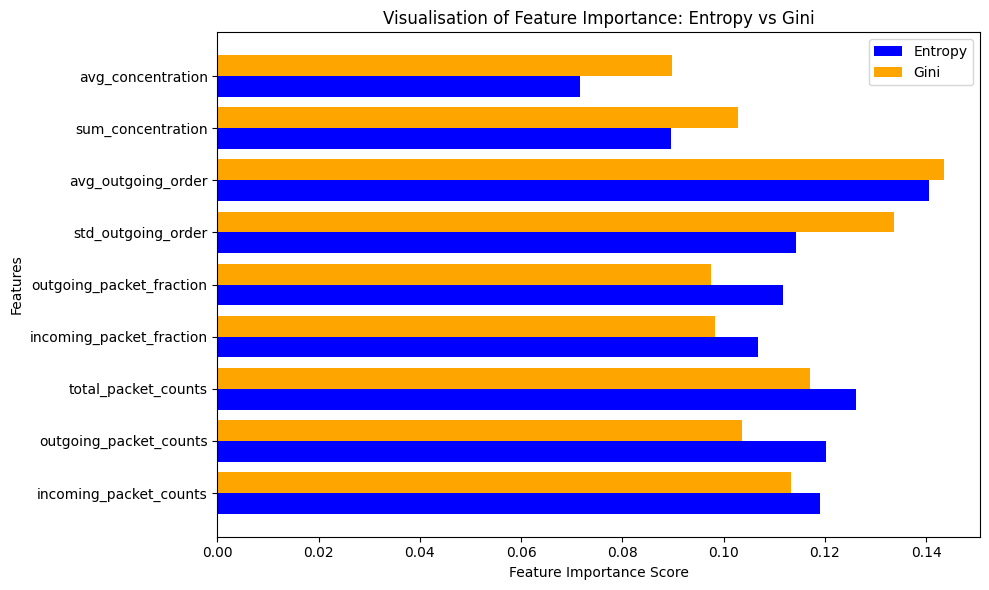

In [17]:
feature_names = df_X.columns
entropy_values = feature_imp_1.values
gini_values = feature_imp_2.values

bar_width = 0.4 
y_positions = range(len(feature_names)) 

plt.figure(figsize=(10,6))

#plotting entropy importance
plt.barh(
    [y - bar_width / 2 for y in y_positions],
    entropy_values,
    bar_width,
    label='Entropy',
    color='blue',
)

# plotting gini improtance
plt.barh(
    [y + bar_width / 2 for y in y_positions],
    gini_values,
    bar_width,
    label='Gini',
    color='orange',
)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.yticks(y_positions, feature_names) 
plt.title('Visualisation of Feature Importance: Entropy vs Gini')
plt.legend()
plt.tight_layout()
plt.show()

Recall the extracted features:
> **Feature Group 1: Traffic Volume (Absolute)**  
> - Feature 1: Number of incoming packets  
> - Feature 2: Number of outgoing packets  
> - Feature 3: Total number of packets  
> 
> **Feature Group 2: Traffic Volume (Fraction)**
> - Feature 1: Number of incoming packets as a fraction of the total number of packets  
> - Feature 2: Number of outgoing packets as a fraction of the total number of packets 
> 
> **Feature Group 3: Traffic Ordering List**
> - Feature 6: Standard deviation of the outgoing packets ordering list  
> - Feature 7: Average of the outgoing packets ordering list  
> 
> **Feature Group 4: Traffic concentration** 
> - Feature 8: Sum of all items in the alternative concentration feature list  
> - Feature 9: Average of all items in the alternative concentration feature list  

We noted that within each of the 4 feature groups, the features are likely to be highly correlated due to their similarity. Furthermore, feature groups 1 and 2 are closely related as well with 1 being an absolute measurement of traffic volume and 2 as the ratio. Hence we will be selecting 2 features from the combination of group 1 and 2, and 1 feature each from group 3 and 4.

According to our feature importance analysis, we have selected the features to be
1. Feature 1: Number of incoming packets   
2. Feature 3: Total number of packets
3. Feature 7: Average of the outgoing packets ordering list 
4. Feature 8: Sum of all items in the alternative concentration feature list  

In [18]:
X = extracted_df[['incoming_packet_counts', 'total_packet_counts', 'avg_outgoing_order', 'sum_concentration']]
y = extracted_df['label']

# Constructing Model with selected features

In this section, we construct an arbitrary random forest classification model using arbitrarily chosen parameters. This section aims to explore the implementation of the model. These parameters will be tuned in the next section. 

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
df = pd.DataFrame(X_train)

In [21]:
df.head()

,incoming_packet_counts,total_packet_counts,avg_outgoing_order,sum_concentration
9363,4257,4696,2166.134396,38.97
23806,1640,1772,713.037879,12.51
5653,608,700,325.532609,7.74
16613,3778,4099,2426.224299,51.25
10512,3286,3748,2265.525974,41.54


In [22]:
# Initialize the model
clf_selected_features = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=100, min_samples_split=2, max_features="sqrt", random_state=42)

# Train the model
clf_selected_features.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, random_state=42)

In [23]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the train set
y_train_pred = clf_selected_features.predict(X_train)
# tracking end time
end_time = time.time()

time_taken_selected_features_train = end_time - start_time
memory_used_selected_features_train = process.memory_info().rss / (1024 * 1024)

In [24]:
# Print accuracy and other metrics
print("Memory used:", memory_used_selected_features_train, "MB")
print("Time taken to predict:", time_taken_selected_features_train, "seconds")
print("Model Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Memory used: 4038.09375 MB
Time taken to predict: 3.1234469413757324 seconds
Model Accuracy: 1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      8023
           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00       166
           5       1.00      1.00      1.00       164
           6       1.00      1.00      1.00       165
           7       1.00      1.00      1.00       153
           8       1.00      1.00      1.00       161
           9       1.00      1.00      1.00       168
          10       1.00      1.00      1.00       167
          11       1.00      1.00      1.00       155
          12       1.00      1.00      1.00       157
          13       1.00      1.00      1.00       160
          14       1.00      1.00     

In [25]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the test set
y_test_pred = clf_selected_features.predict(X_test)
# tracking end time
end_time = time.time()

time_taken_selected_features_test = end_time - start_time
memory_used_selected_features_test = process.memory_info().rss / (1024 * 1024)

In [26]:
# Print accuracy and other metrics
print("Memory used:", memory_used_selected_features_test, "MB")
print("Time taken to predict:", time_taken_selected_features_test, "seconds")
print("Model Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Memory used: 4038.109375 MB
Time taken to predict: 0.7140085697174072 seconds
Model Accuracy: 0.6024137931034482
              precision    recall  f1-score   support

          -1       0.58      0.80      0.67      1977
           0       0.72      0.37      0.49        35
           1       0.39      0.18      0.25        38
           2       0.74      0.76      0.75        37
           3       0.58      0.53      0.55        36
           4       0.47      0.53      0.50        34
           5       0.64      0.58      0.61        36
           6       0.72      0.74      0.73        35
           7       0.39      0.28      0.33        47
           8       0.63      0.44      0.52        39
           9       0.46      0.38      0.41        32
          10       0.60      0.45      0.52        33
          11       0.64      0.51      0.57        45
          12       0.73      0.77      0.75        43
          13       0.36      0.25      0.29        40
          14       0.5

# Model Tuning

In [27]:
# Defining the parameter grid for the Grid Search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy']           
}

# Defining the grid search
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=5,  
    refit=True, 
    verbose = 3,
    n_jobs=-1
)

In [28]:
# Fitting the grid search
start_time = time.time()
grid.fit(X_train, y_train)
end_time = time.time()
time_taken_grid_search = end_time - start_time

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [29]:
# Print the time taken to perform the grid search
print("Time taken for grid search:", time_taken_grid_search, "seconds")

Time taken for grid search: 2487.351676464081 seconds


In [30]:
# Print best parameters after grid search
print("Best parameters found:", grid.best_params_)

Best parameters found: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [31]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the test set
y_train_pred = grid.predict(X_train)
# tracking end time
end_time = time.time()

time_taken_selected_features_tuned_train = end_time - start_time
memory_used_selected_features_tuned_train = process.memory_info().rss / (1024 * 1024)

In [32]:
# Print accuracy and other metrics
print("Memory used:", memory_used_selected_features_tuned_train, "MB")
print("Time taken to predict:", time_taken_selected_features_tuned_train, "seconds")
print("Model Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

Memory used: 738.1953125 MB
Time taken to predict: 2.1690099239349365 seconds
Model Accuracy: 0.7570258620689655
              precision    recall  f1-score   support

          -1       0.66      0.95      0.78      8023
           0       0.96      0.60      0.74       165
           1       0.97      0.46      0.62       162
           2       0.86      0.82      0.84       163
           3       0.92      0.75      0.83       164
           4       0.87      0.67      0.76       166
           5       0.85      0.77      0.81       164
           6       0.97      0.77      0.86       165
           7       0.82      0.71      0.76       153
           8       0.89      0.75      0.81       161
           9       0.88      0.64      0.74       168
          10       0.82      0.54      0.65       167
          11       0.87      0.60      0.71       155
          12       0.86      0.88      0.87       157
          13       0.87      0.47      0.62       160
          14       0.9

In [33]:
# Create a process object to track current process
process = psutil.Process(os.getpid())
# tracking start time
start_time = time.time()
# Make predictions on the test set
y_test_pred = grid.predict(X_test)
# tracking end time
end_time = time.time()

time_taken_selected_features_tuned_test = end_time - start_time
memory_used_selected_features_tuned_test = process.memory_info().rss / (1024 * 1024)

In [34]:
# Print accuracy and other metrics
print("Memory used:", memory_used_selected_features_tuned_test, "MB")
print("Time taken to predict:", time_taken_selected_features_tuned_test, "seconds")
print("Model Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Memory used: 739.765625 MB
Time taken to predict: 0.7559921741485596 seconds
Model Accuracy: 0.5793103448275863
              precision    recall  f1-score   support

          -1       0.52      0.86      0.65      1977
           0       0.83      0.29      0.43        35
           1       0.33      0.05      0.09        38
           2       0.72      0.70      0.71        37
           3       0.64      0.44      0.52        36
           4       0.64      0.41      0.50        34
           5       0.73      0.53      0.61        36
           6       0.85      0.63      0.72        35
           7       0.43      0.26      0.32        47
           8       0.68      0.44      0.53        39
           9       0.48      0.31      0.38        32
          10       0.53      0.30      0.38        33
          11       0.64      0.40      0.49        45
          12       0.67      0.72      0.70        43
          13       0.47      0.17      0.25        40
          14       0.67

In [69]:
with open('datasets/ow_multi.pkl', 'wb') as f:
    pickle.dump(classification_report(y_test, y_test_pred, output_dict=True), f)